# K-평균 알고리즘

## 개념 및 특징

- K-means: 대표적인 clustering 알고리즘. 군집 중심점이라는 특정한 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
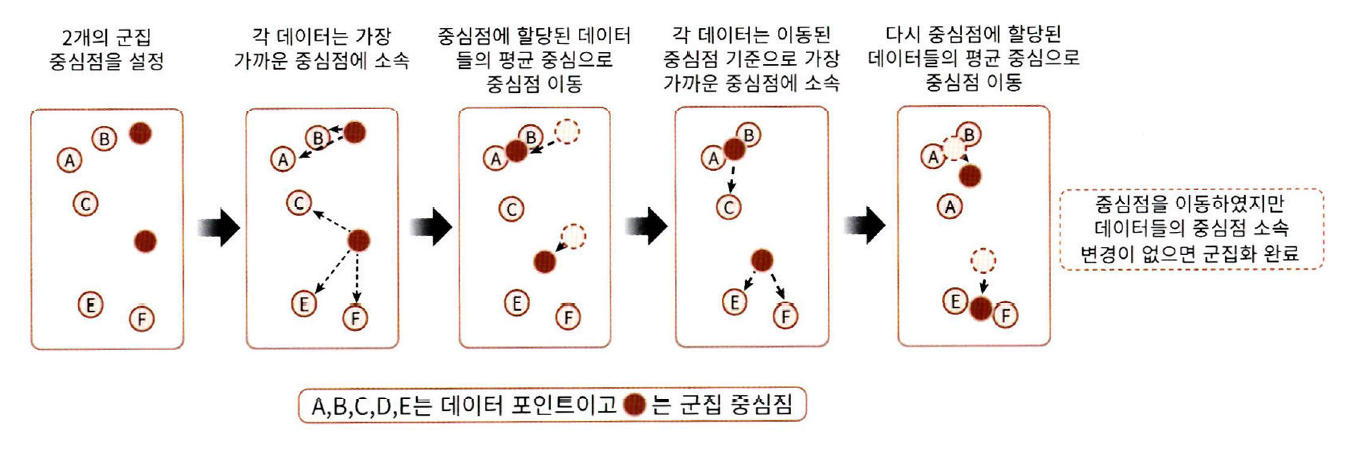

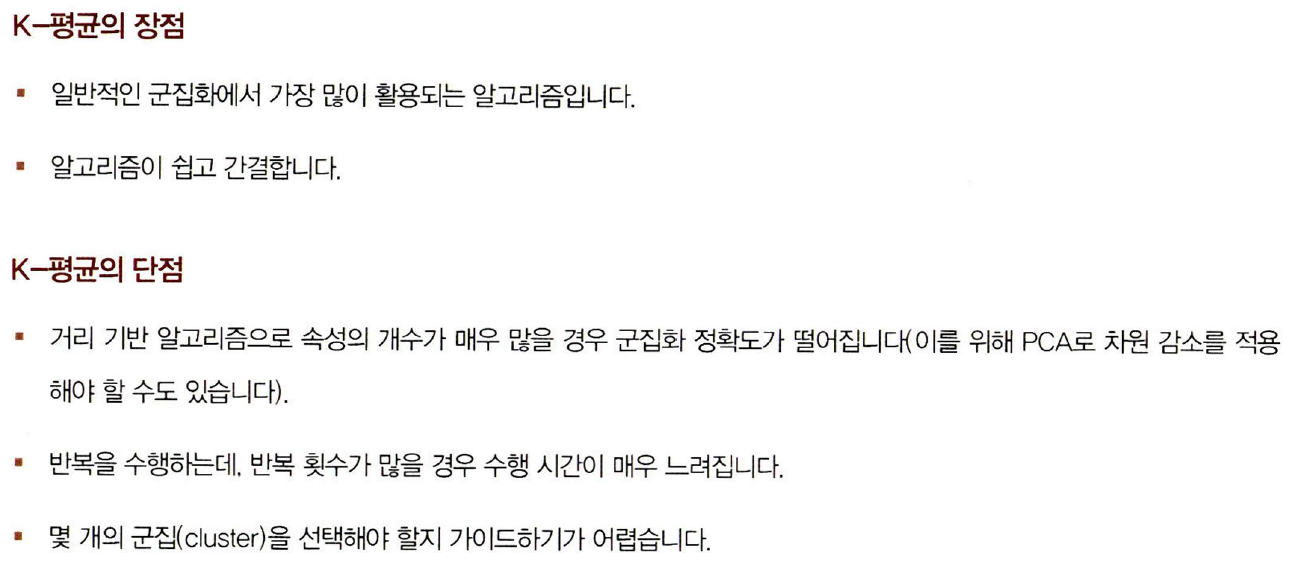

## 사이킷런 KMeans 클래스 소개

``` python
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```

- n_clusters: 군집화할 개수 (군집 중심점의 개수)
- init: 초기 군집 중심점 좌표 설정할 방식. 일반적으로는 random하게보다는 k-means++ 방식으로 최초 설정. 
    - k-means++
        1. 먼저 맨 처음 데이터를 centroid1으로 둡니다. 
        2. cenctoid1으로부터 가장 멀리 떨어져 있는 데이터를 centroid2로 둡니다. 
        3. centroid1과 centroid2로부터 가장 멀리 떨어져 있는 데이터를 centroid3로 둡니다. (k=3인 경우)
        4. 이렇게 K번 반복하여 초기 centroid를 정해주는 것입니다. 
        임의로 정하거나 랜덤하게 정하는 것보다 iteration 횟수를 줄여주어 좀 더 효율적입니다.
- max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

__<fit(fit_transform) method에서의 속성>__
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 각 군집 중심정 좌표

## K-means를 이용한 붓꽃 데이터세트 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


=> 각 데이터가 어떤 군집 중심에 속했는지 확인 가능

In [6]:
irisDF['target'] = iris.target #실제 y(품종)
irisDF['cluster']=kmeans.labels_ #k-means 결과

iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

- 실제 분류가 0인 데이터: 모두 1번 군집으로 그루핑됨
- 실제 분류가 1인 데이터: 96%가 0번 군집으로 그루핑됨. 나머지는 2번 군지으로 그루핑.
- 실제 분류가 2인 데이터: 72%가 2번 군집으로 그루핑됨. 나머지는 0번 군집으로 그루핑.

**<PCA를 이용하여 2차원으로 시각화>**

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


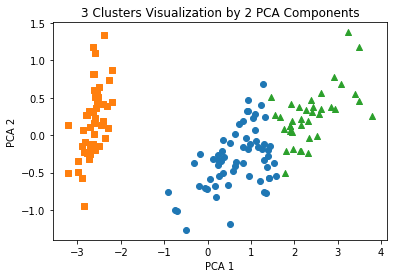

In [14]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- 주황네모(군집1)는 다른 군집과 명확히 분리됨.
- 파랑동그라미(군집0)과 초록세모(군집2)는 아주 명확히 분리되지 않음

## 군집화 알고리즘 테스트를 위한 데이터 생성

**<사이킷런에서 제공하는 군집화용 데이터 생성기>**
- make_blobs(): 개별 군집의 중심점과 표준 편차 제어 기능 O
    - 파라미터: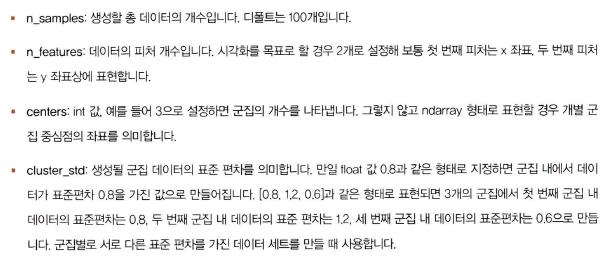
- make_classification(): 노이즈를 포함한 데이터 생성 기능 O

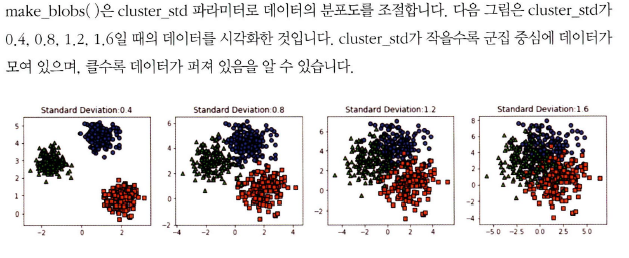

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


=> 총 200개의 샘플. 2개의 피처. 3개의 군집 기반.

데이터프레임 생성:

In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


시각화:

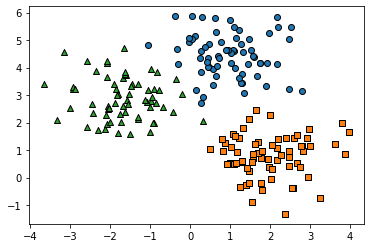

In [17]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

KMeans 수행 수 군집별로 시각화:

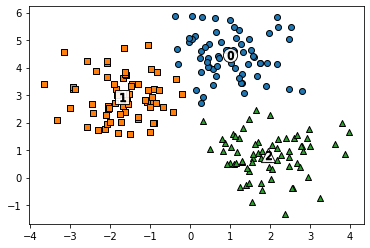

In [12]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [13]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


실제 target과 kmeans_label이 다른 경우도 있지만 대체로 동일함

# 군집 평가

y가 없는 비지도학습 중 하나의 군집화의 성능 평가

대표적으로 실루엣 분석 사용

## 실루엣 분석의 개요

- 실루엣 계수
    - 개별 데이터가 가지는 군집화 지표
    - 해당 데이터가 같은 군집 내의 데이터와는 얼마나 가깝게 군집화돼 있고, 다른 군집의 데이터와는 얼마나 멀리 분리돼 있는지를 나타냄
    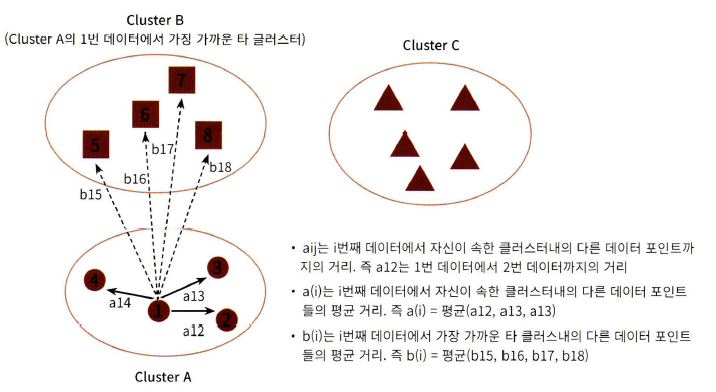
    - a(i): 같은 군집 내 다른 데이터와의 거리 평균
    - b(i): 다른 군집 중 가장 가까운 군집 내 데이터와의 거리 평균
    - b(i) - a(i): 두 군집이 떨어진 거리
    - 실루엣 계수 s(i): $s(i) = \frac {b(i)-a(i)}{max(a(i),b(i))}$ 
    - 범위: [-1, 1]
        - 0에 가까울수록 해당 데이터가 근처의 군집과 가까움
        - 1에 가까울수록 해당 데이터가 근처의 군집과 멀리 떨어져있음
        - 음수면 해당 데이터가 다른 군집에 할당됨
    - 1에 가까울수록 좋음

- 사이킷런 실루엣 분석
    - silhouette_samples(X, labels, metric='euclidean'): 실루엣 계수 계산
    - silhouette_score(X, labels, metric='euclidean'): 모든 데이터 포인트의 실루엣 계수의 평균값. 0~1사이의 값을 가짐.


- 좋은 군집화가 되기 위한 조건
    1. silhouette_score()이 1에 가까울수록 좋음
    2. 개별 군집의 평균값의 편차가 크기 않아야함. 개별 군집의 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않아야 함.

## 붓꽃 데이터세트를 이용한 군집 평가

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [25]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

In [34]:
# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)
print(score_samples[:10])

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('\n붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
[0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294  ]

붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [19]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

=> 1번 군집은 실루엣 계수 평균값이 높은 반면, 0번과 2번 군집은 상대적으로 낮음

## **클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법**

1. 군집 개수를 2개로 정했을 때
    - 평균 실루엣 계수: 0.704
    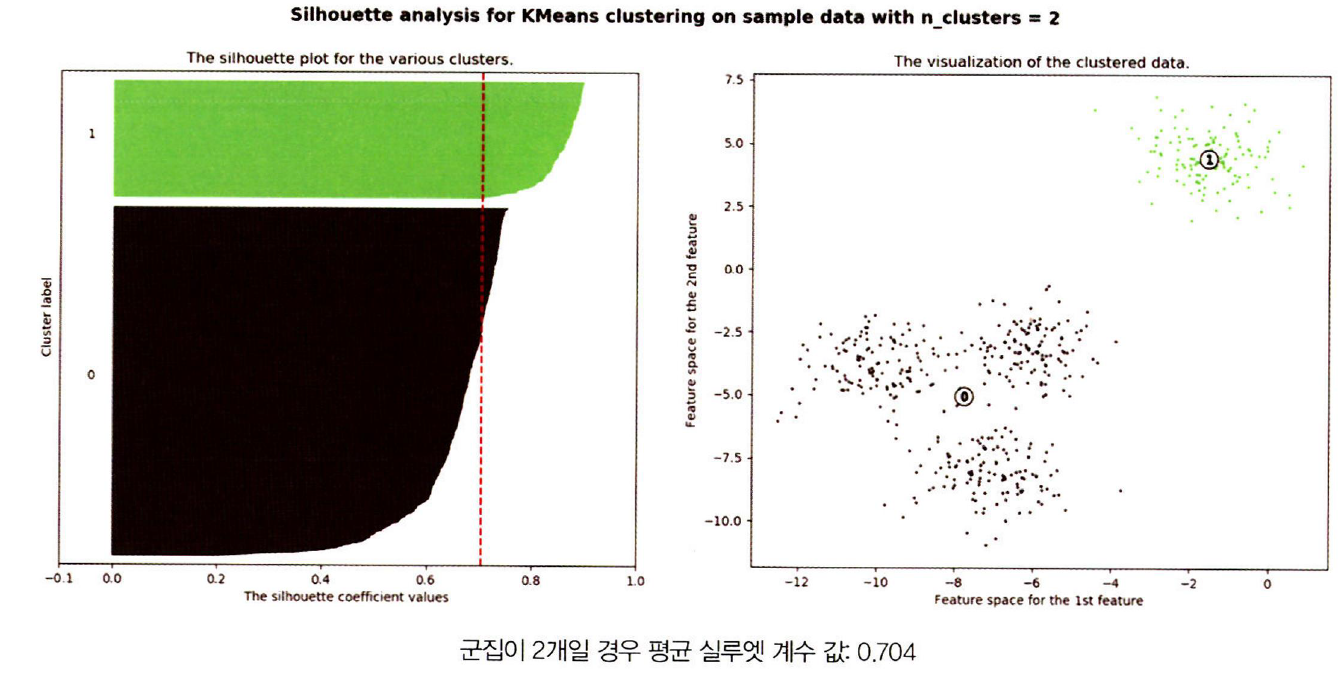
    - 왼쪽 plot: 1번 군집의 모든 데이터는 평균 실루엣 계수 이상이지만, 0번 군집은 그 이하인 데이터가 많음
    - 오른쪽 plot: 0번 군집은 내부 데이터끼리 많이 떨어쟈있음.

2. 군집 개수를 3개로 정했을 때
    - 평균 실루엣 계수: 0.588
    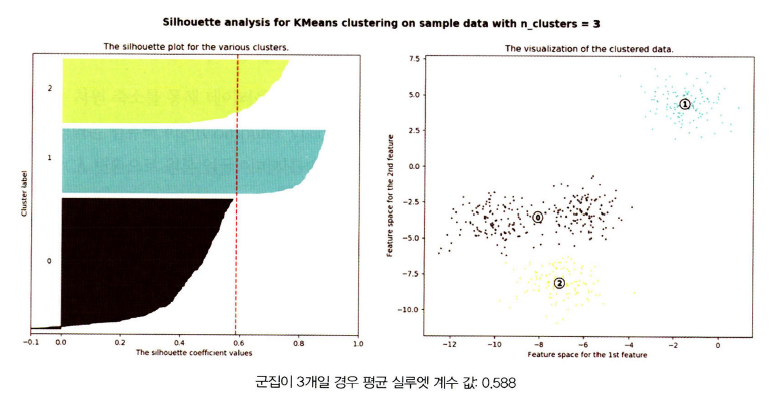
    - 0번 군집은 모두 평균 이하

3. 군집 개수를 4개로 정했을 때
    - 평균 실루엣 계수: 0.65
    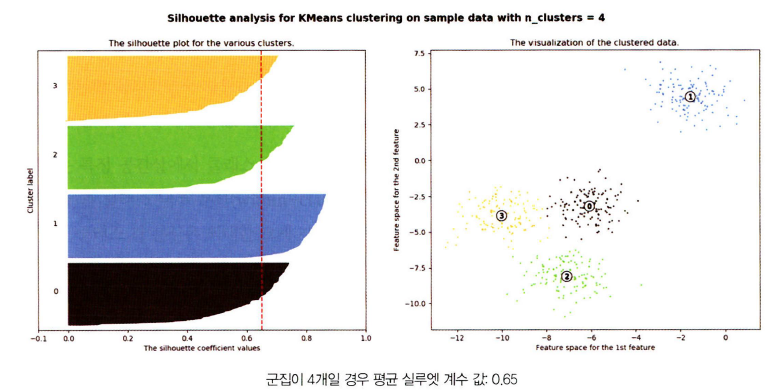
    - 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치함

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

데이터 만들어서 시각화 하기:

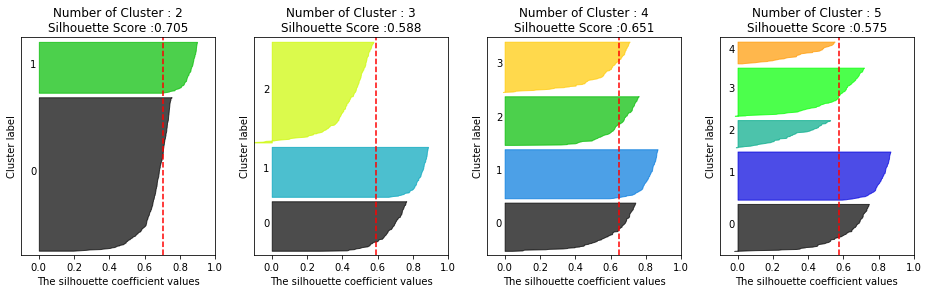

In [21]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

=> 4개일 때 가장 최적

붓꽃 데이터셋 시각화하기:

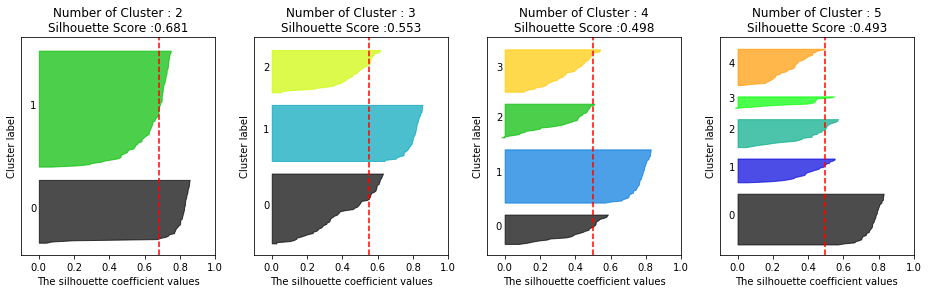

In [22]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

=> 2개일 때 가장 최적

**실루엣 계수를 통한 K-means clustering 평가 방법의 특징**

- 장점: 직관적
- 단점: 데이터 양이 많이지면 오래걸림 => 군집별로 데이터 샘플링
